In [2]:
!wget https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P87-Section-3-Visual-Exploration-Resources.zip

import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Unzip the file and delete the zip file
zip_ref = zipfile.ZipFile('P87-Section-3-Visual-Exploration-Resources.zip', 'r')
zip_ref.extractall('.')
zip_ref.close()
os.remove('P87-Section-3-Visual-Exploration-Resources.zip')

df = pd.read_csv('P87-S3-Visual-Exploration-Resources/heart.csv')
df.head()

--2022-04-11 13:03:55--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P87-Section-3-Visual-Exploration-Resources.zip
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.106.194
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.106.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7169521 (6.8M) [application/x-zip-compressed]
Saving to: ‘P87-Section-3-Visual-Exploration-Resources.zip’

P87-Section-3-Visua 100%[===================>]   6.84M  6.20MB/s    in 1.1s    

2022-04-11 13:03:57 (6.20 MB/s) - ‘P87-Section-3-Visual-Exploration-Resources.zip’ saved [7169521/7169521]



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# group by chest pain(cp) and return the median
chest_pain = df.groupby('cp').median().reset_index()
chest_pain.head()

,cp,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,57.0,1.0,130.0,248.0,0.0,0.0,143.0,1.0,1.2,1.0,1.0,3.0,0.0
1,1,52.0,1.0,128.0,238.0,0.0,1.0,163.5,0.0,0.0,2.0,0.0,2.0,1.0
2,2,53.0,1.0,130.0,233.0,0.0,1.0,158.0,0.0,0.5,2.0,0.0,2.0,1.0
3,3,59.0,1.0,140.0,234.0,0.0,0.0,159.0,0.0,1.2,1.0,0.0,2.0,1.0


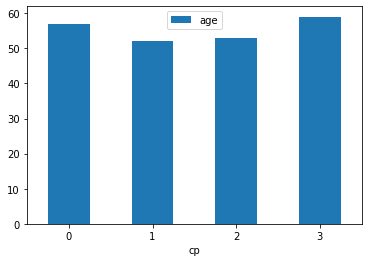

In [9]:
# bar plot of chest pain
chest_pain.plot.bar(x='cp', y='age', rot=0);

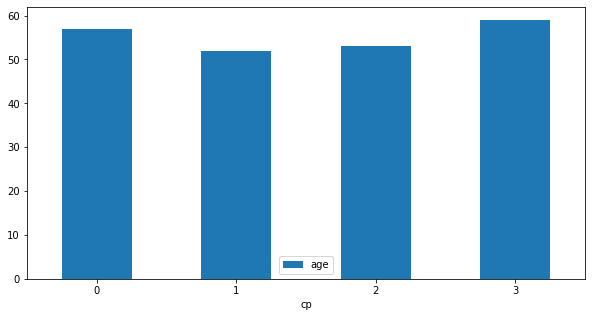

In [10]:
# bar plot of chest pain and age
chest_pain.plot.bar(x='cp', y='age', rot=0, figsize=(10,5));

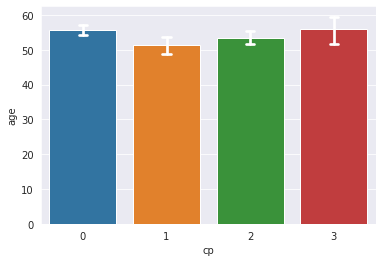

In [23]:
# bar plot in seaborn style
sns.set_style('darkgrid')
sns.barplot(x='cp', y='age', errcolor='w', capsize=0.1, data=df);

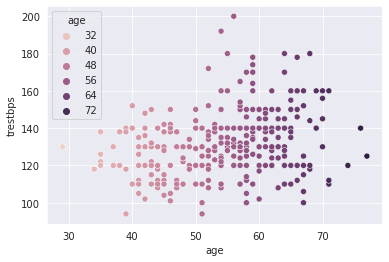

In [25]:
# scatter plot of age and trestbps
sns.set_style('darkgrid')
sns.scatterplot(x='age', y='trestbps', data=df, hue='age');

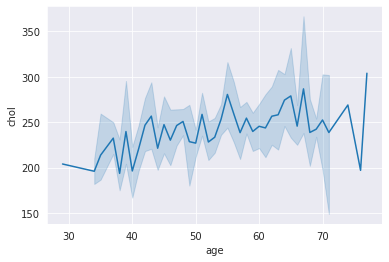

In [29]:
# Line plot of age and chol
sns.set_style('darkgrid')
sns.lineplot(x='age', y='chol', data=df);

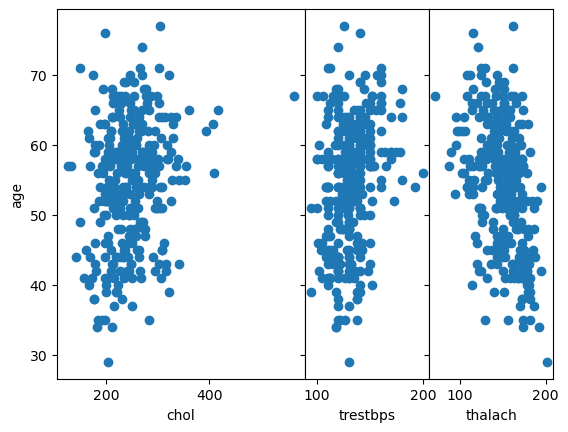

In [33]:
with plt.style.context("default"):
    fig, axes = plt.subplots(ncols=3, sharey=True, 
                             gridspec_kw={"width_ratios": [2, 1, 1], "wspace": 0})
    y = "age"
    xs = ["chol", "trestbps", "thalach"]
    for x, ax in zip(xs, axes):
        ax.scatter(df[x], df[y])
        ax.set_xlabel(x)
    axes[0].set_ylabel(y)
    fig.savefig("output.png", dpi=100, bbox_inches="tight")
    fig.savefig("output.pdf", dpi=100, bbox_inches="tight")

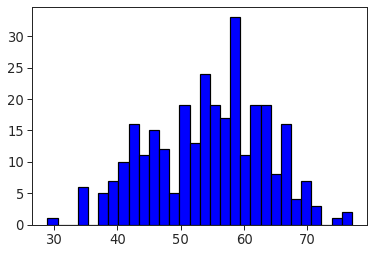

In [34]:
plt.hist(df.age, bins=30, color='blue', edgecolor='black', linewidth=1.2);

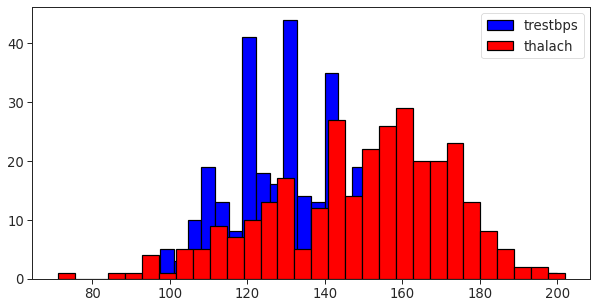

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(df.trestbps, bins=30, color='blue', edgecolor='black', linewidth=1.2);
ax.hist(df.thalach, bins=30, color='red', edgecolor='black', linewidth=1.2);
ax.legend(['trestbps', 'thalach'], loc='upper right');

## Box Plots
Shows mean, quartile, IQR and outliers

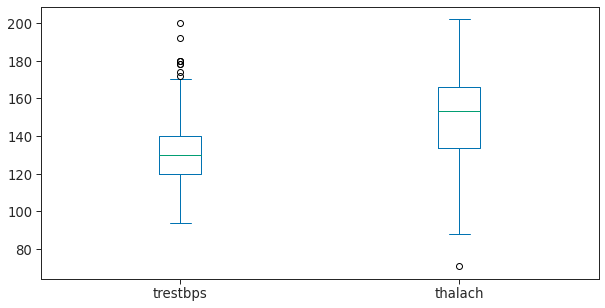

In [37]:
df[['trestbps', 'thalach']].plot.box(figsize=(10,5));

In [41]:
df[['trestbps', 'thalach']].describe()

,trestbps,thalach
count,303.000000,303.000000
mean,131.623762,149.646865
std,17.538143,22.905161
min,94.000000,71.000000
25%,120.000000,133.500000
50%,130.000000,153.000000
75%,140.000000,166.000000
max,200.000000,202.000000


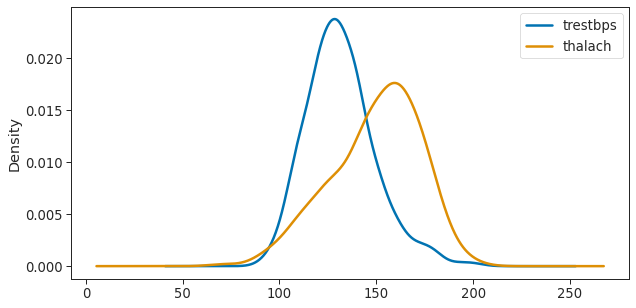

In [38]:
df[['trestbps', 'thalach']].plot.kde(figsize=(10,5));

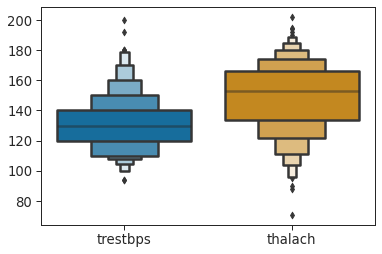

In [48]:
sns.boxenplot(data=df[['trestbps', 'thalach']]);

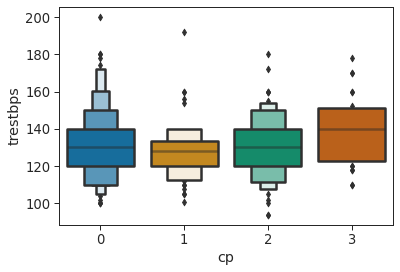

In [49]:
sns.boxenplot(x='cp', y='trestbps', data=df);

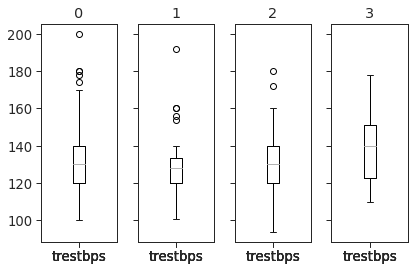

In [54]:
df.groupby('cp').boxplot(column='trestbps', sharex=True, layout=(1,4), grid=False);
plt.tight_layout();

## Violin Plots
Like box plots but better. Not a staple of pandas at the moment

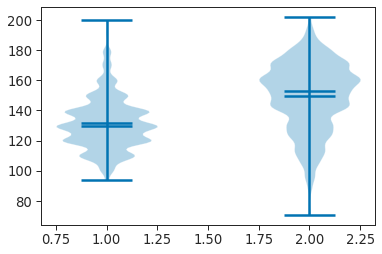

In [61]:
fig, ax = plt.subplots()
ax.violinplot(df[['trestbps', 'thalach']], showmeans=True, showmedians=True, showextrema=True, bw_method=0.15);

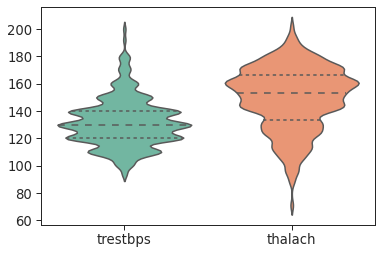

In [75]:
sns.violinplot(data=df[['trestbps', 'thalach']], 
    inner='quartile', palette='Set2', scale='width', linewidth=1.5, bw=0.15);

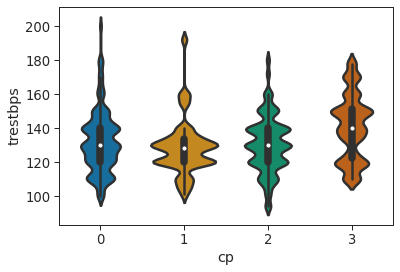

In [65]:
sns.violinplot(x='cp', y='trestbps', data=df, bw=0.15);

## Bee Swarm Plots
If you want to go fancy, these can be fun for presentations but less concise than other plots

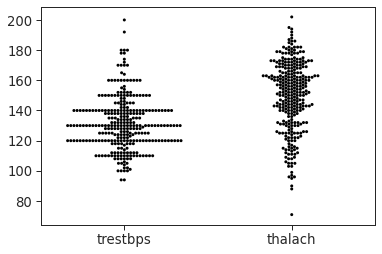

In [76]:
sns.swarmplot(data=df[['trestbps', 'thalach']], size=3, color='black');

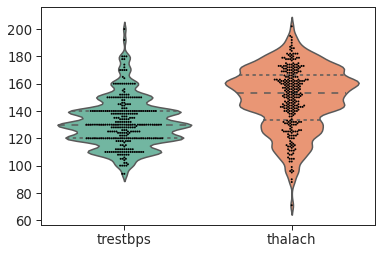

In [88]:
sns.violinplot(data=df[['trestbps', 'thalach']], 
    inner='quartile', palette='Set2', scale='width', linewidth=1.5, bw=0.15);
sns.swarmplot(data=df[['trestbps', 'thalach']], size=2, color='black');

#save the figure
plt.savefig("Saved Plots/outputBeesSwarm.pdf", bbox_inches="tight")
plt.savefig("Saved Plots/outputBeesSwarm.png", dpi=100, bbox_inches="tight")

In [92]:
meteor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [93]:
# drop NA for "reclong" and "reclat"
meteor_df.dropna(subset=['reclong', 'reclat'], inplace=True)
# drop rows with "reclong" more than 300
meteor_df = meteor_df[meteor_df.reclong < 300]
# display info
meteor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38400 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         38400 non-null  object 
 1   id           38400 non-null  int64  
 2   nametype     38400 non-null  object 
 3   recclass     38400 non-null  object 
 4   mass         38282 non-null  float64
 5   fall         38400 non-null  object 
 6   year         38225 non-null  float64
 7   reclat       38400 non-null  float64
 8   reclong      38400 non-null  float64
 9   GeoLocation  38400 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.2+ MB
